In [1]:
from fastai.vision.all import *
import gradio as gr
from fastai.vision.all import *
import pandas as pd

In [2]:
base_path = Path("M:/acne_projcet/acne_1024")
used_folders = ['0.derece', '1.derece', '2.derece', '3.derece']
data_path = Path("M:\acne_projcet\acne_1024")

In [3]:
def get_items_filtered(path):
    valid_dirs = ['0.derece', '1.derece', '2.derece', '3.derece']
    return get_image_files(path).filter(lambda x: x.parent.name in valid_dirs)

In [4]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_items_filtered,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

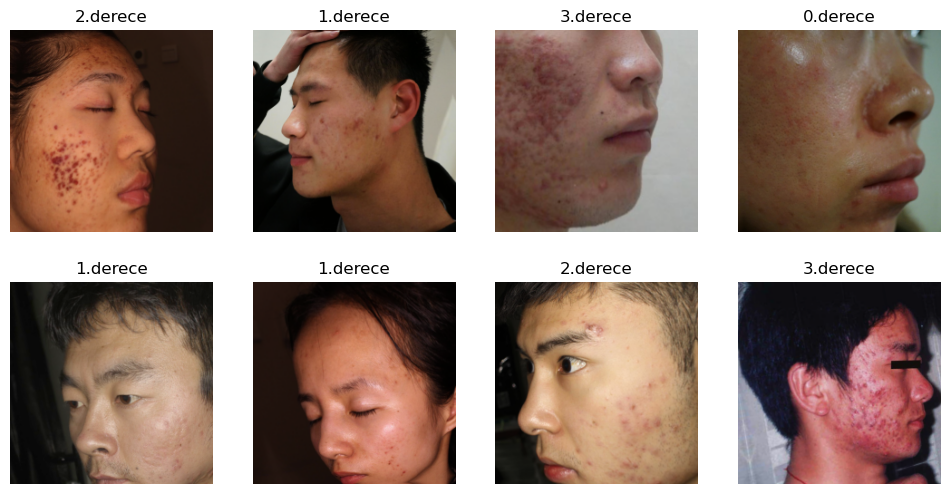

In [5]:
dls = dblock.dataloaders(base_path, bs=32)
dls.show_batch(max_n=8)

In [6]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.196396,1.299383,0.490909,06:30


epoch,train_loss,valid_loss,accuracy,time
0,1.523409,1.231464,0.574545,08:18
1,1.338701,1.111888,0.589091,08:23
2,1.105982,0.963248,0.643636,10:22
